In [2]:
!pip install capymoa

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 37.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=5922b71e740c8db00f093c9bdb44f1ae0e948bd765ca32647d0fbdb04207b5c6
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [9]:
from capymoa.stream.drift import DriftStream, AbruptDrift, GradualDrift
from capymoa.stream.generator import SEA

stream_sea2drift = DriftStream(
    stream=[
        SEA(function=1),
        AbruptDrift(position=5000),
        SEA(function=3),
        GradualDrift(position=10000, width=2000),
        # GradualDrift(start=9000, end=12000),
        SEA(function=1),
    ]
)


In [11]:
from capymoa.classifier import HoeffdingTree, HoeffdingAdaptiveTree, NaiveBayes
learners = {
    "HT": HoeffdingTree(schema=stream_sea2drift.schema, grace_period=50),
    "AHT": HoeffdingAdaptiveTree(schema=stream_sea2drift.schema, grace_period=50),
    "NB": NaiveBayes(schema=stream_sea2drift.schema)
}

HT cumulative accuracy = 86.947
AHT cumulative accuracy = 86.800
NB cumulative accuracy = 87.267


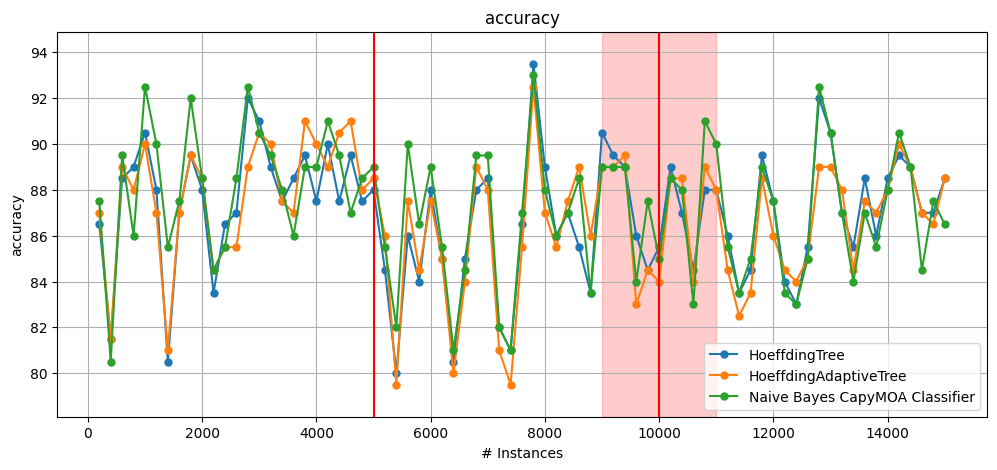

In [13]:
from capymoa.evaluation import prequential_evaluation_multiple_learners
from capymoa.evaluation.visualization import plot_windowed_results

results = prequential_evaluation_multiple_learners(
    stream=stream_sea2drift,
    learners=learners,
    window_size=200,
    max_instances=15000
)


for name in learners.keys():
    print(f"{name} cumulative accuracy = {results[name].cumulative.accuracy():.3f}")

plot_windowed_results(*[results[name] for name in learners.keys()], metric="accuracy")